In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
table_file_append = "comparison_output_rank6.csv"
table_file = "comparison_final_rank4.csv"

In [3]:
comparison_table = pd.read_csv(table_file)
comparison_table.tail()

,N,window,model,err_inf,err_2,err_fro,model_MSE,true_MSE
441,200.0,NaN,5.0,0.029529,0.812384,0.973991,0.261609,NaN
442,400.0,NaN,5.0,0.030095,1.240009,1.473037,0.260342,NaN
443,1000.0,NaN,5.0,0.010043,0.979333,1.122901,0.253482,NaN
444,2000.0,NaN,5.0,0.007881,1.604557,1.830306,0.252237,NaN
445,4000.0,NaN,5.0,0.003626,1.289425,1.422682,0.252862,NaN


In [4]:
append_table = pd.read_csv(table_file_append)
append_table.tail()

,N,window,model,err_inf,err_2,err_fro,model_MSE,true_MSE
415,4000,6,3,0.000438,0.253486,0.287136,0.245754,0.249769
416,4000,7,3,0.000446,0.256982,0.291396,0.248634,0.252503
417,4000,8,3,0.000436,0.252391,0.286286,0.246402,0.250254
418,4000,9,3,0.000445,0.255385,0.290110,0.248584,0.252598
419,4000,10,3,0.000443,0.255618,0.289712,0.244014,0.247662


In [5]:
to_append = append_table[append_table.model != 1]
to_append.loc[:, "model"] = to_append.loc[:, "model"] + 5
comparison_table = comparison_table.append(to_append)

/home/kamdh/local/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [6]:
comparison_table.tail()

,N,window,model,err_inf,err_2,err_fro,model_MSE,true_MSE
415,4000.0,6.0,8.0,0.000438,0.253486,0.287136,0.245754,0.249769
416,4000.0,7.0,8.0,0.000446,0.256982,0.291396,0.248634,0.252503
417,4000.0,8.0,8.0,0.000436,0.252391,0.286286,0.246402,0.250254
418,4000.0,9.0,8.0,0.000445,0.255385,0.290110,0.248584,0.252598
419,4000.0,10.0,8.0,0.000443,0.255618,0.289712,0.244014,0.247662


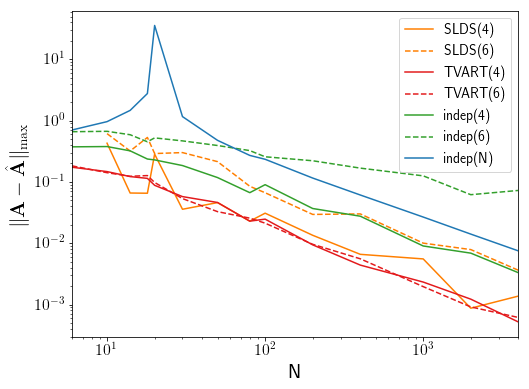

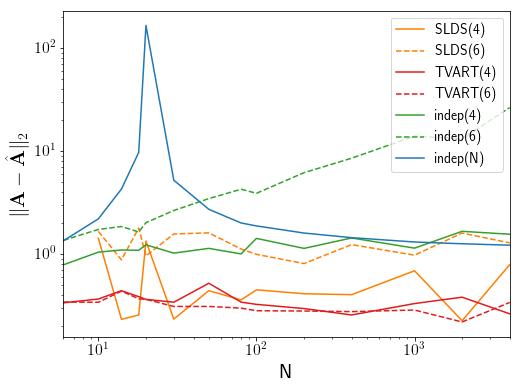

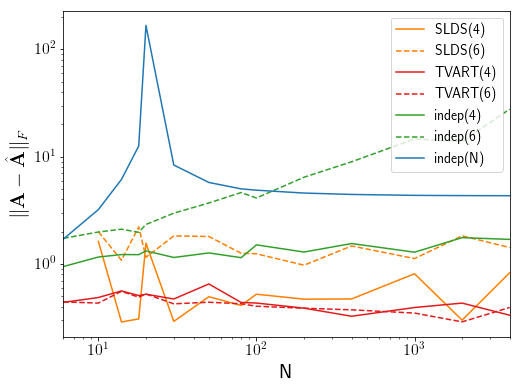

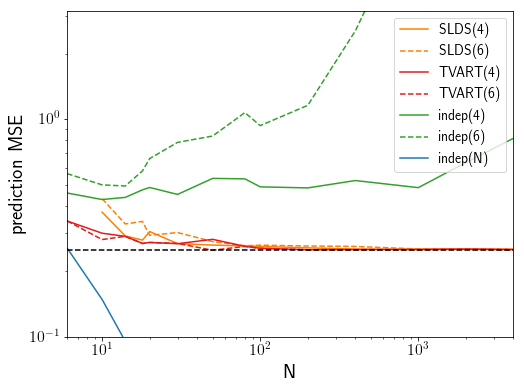

In [7]:
data = comparison_table.copy()
data['model'].replace({1: 'indep(N)', 2: 'indep(4)', 3: 'TVART(4)',
                       4: 'SLDS(4)', 5: 'SLDS(6)', 7: 'indep(6)', 8: 'TVART(6)'}, inplace=True)


import matplotlib
import seaborn as sns

#sns.set()

rgb_values = sns.color_palette("Paired")

plt.rc('text', usetex=True)
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
matplotlib.rcParams.update({'font.size': 16})

#plt.loglog(data['N'], data['err_2'])

for plot_type in ['err_inf', 'err_2', 'err_fro', 'model_MSE']:
    fig, ax = plt.subplots(figsize=(8,6))
    for key, grp in data.sort_values('model').groupby(['model']):
        grp = grp.groupby(['N']).mean()
        skip_plot = False
        if key == 'indep(N)':
            style = '-'
            color = rgb_values[1]
        elif key == 'indep(4)':
            style = '-'
            color = rgb_values[3]
        elif key == 'TVART(4)':
            style = '-'
            color = rgb_values[5]
        elif key == 'SLDS(4)':
            style = '-'
            color = rgb_values[7]
        elif key == 'SLDS(6)':
            style = '--'
            color = rgb_values[7]
        elif key == 'indep(6)':
            style = '--'
            color = rgb_values[3]
        elif key == 'TVART(6)':
            style = '--'
            color = rgb_values[5]
        else:
            skip_plot = True
        if not skip_plot:
            ax = grp.plot(ax=ax, kind='line', y=plot_type, label=key, logx=True, logy=True,
                         style=style, color=color)
    plt.legend(loc='upper right', fontsize=14)
    plt.xlabel('N', fontsize=20)
    if plot_type == 'err_inf':
        plt.ylabel("$\| \mathbf{A} - \hat{\mathbf{A}} \|_\mathrm{max}$", fontsize=20)
    elif plot_type == 'err_2':
        plt.ylabel("$\| \mathbf{A} - \hat{\mathbf{A}} \|_{2}$", fontsize=20)
    elif plot_type == 'err_fro':
        plt.ylabel("$\| \mathbf{A} - \hat{\mathbf{A}} \|_F$", fontsize=20)
    elif plot_type == 'model_MSE':
        plt.ylabel("prediction MSE", fontsize=20)
        plt.plot([min(grp.index), max(grp.index)], [0.25, 0.25], 'k--')
        plt.ylim([10**-1, 10**0.5])
    plt.savefig("../figures/compare_" + plot_type + ".eps")
    plt.show()
    #plt.close()